<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [519]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [520]:
# Installing the libraries with the specified version.
!pip install imbalanced-learn seaborn --quiet --user

In [521]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score, f1_score, accuracy_score, precision_score

import random
import time

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [522]:
# loading data into a pandas dataframe
bank_data = pd.read_csv("/content/drive/MyDrive/bank.csv")

# copy the original data set.
data = bank_data.copy()

## Data Overview

View the first 5 rows of the dataset

In [523]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


View the last 5 rows of the dataset

In [524]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Understand the shape of the dataset

In [525]:
data.shape

(10000, 14)

There are 10000 rows and 14 columns

Check the data types of the columns for the dataset.

In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values

In [527]:
data.duplicated().sum() # checking for duplicates

np.int64(0)

There are no duplicate rows

In [528]:
data.isna().sum() # checking for missing values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No NULL values in the columns

In [529]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


RowNumber and CustomerId are unique identifiers, so they may not add value for modeling so drop them.

Surname has 2,932 unique values — it's likely not useful unless you're doing very specific personalization or name-based analysis.

In [530]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [531]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins='auto',
                      zscore_filter=False, z_thresh=3, color='cornflowerblue'):
    """
    Combined Boxplot and Histogram with enhancements.

    Parameters:
    - data: DataFrame
    - feature: column name (str)
    - figsize: tuple, default (12, 7)
    - kde: bool, show KDE density line
    - bins: int or 'auto' or None
    - zscore_filter: bool, remove outliers using z-score
    - z_thresh: threshold for z-score filtering
    - color: color for plots
    """
    # Filter out missing values
    feature_data = data[feature].dropna()

    # Optional Z-score filtering
    if zscore_filter:
        from scipy.stats import zscore
        z_scores = np.abs(zscore(feature_data))
        feature_data = feature_data[z_scores < z_thresh]

    # Plot setup
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    sns.set_style("whitegrid")

    # Boxplot
    sns.boxplot(x=feature_data, ax=ax_box, showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
                color=color)
    ax_box.set(xlabel='')
    ax_box.set_title(f"Distribution of '{feature}'", fontsize=14, weight='bold')

    # Histogram
    sns.histplot(feature_data, kde=kde, bins=bins, ax=ax_hist, color=color, edgecolor='black')

    # Mean and median lines
    mean_val = feature_data.mean()
    median_val = feature_data.median()
    ax_hist.axvline(mean_val, color="green", linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax_hist.axvline(median_val, color="red", linestyle="-", label=f"Median: {median_val:.2f}")

    # Decorations
    ax_hist.legend()
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Count")
    plt.tight_layout()
    plt.show()

In [532]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

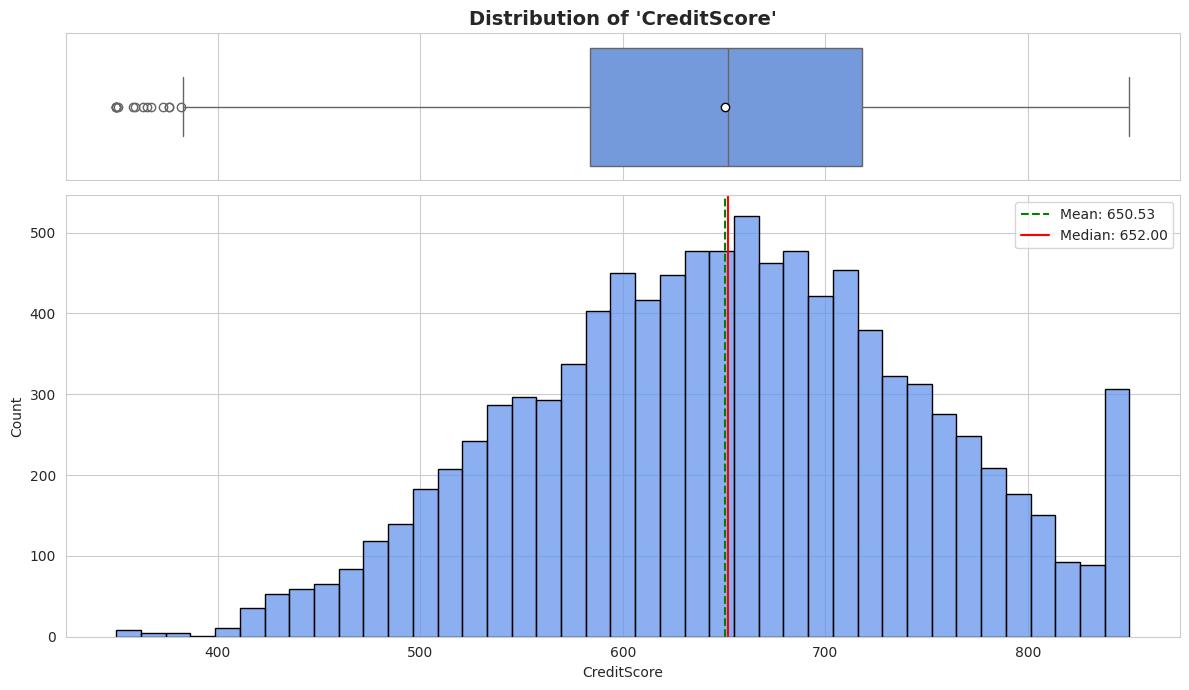

In [533]:
histogram_boxplot(data, 'CreditScore')

Mean (green dashed line) and Median (red solid line) are quite close, indicating a roughly symmetric distribution.

There are some mild outliers visible in the boxplot, but nothing extreme.

The distribution is unimodal with a slight skew.

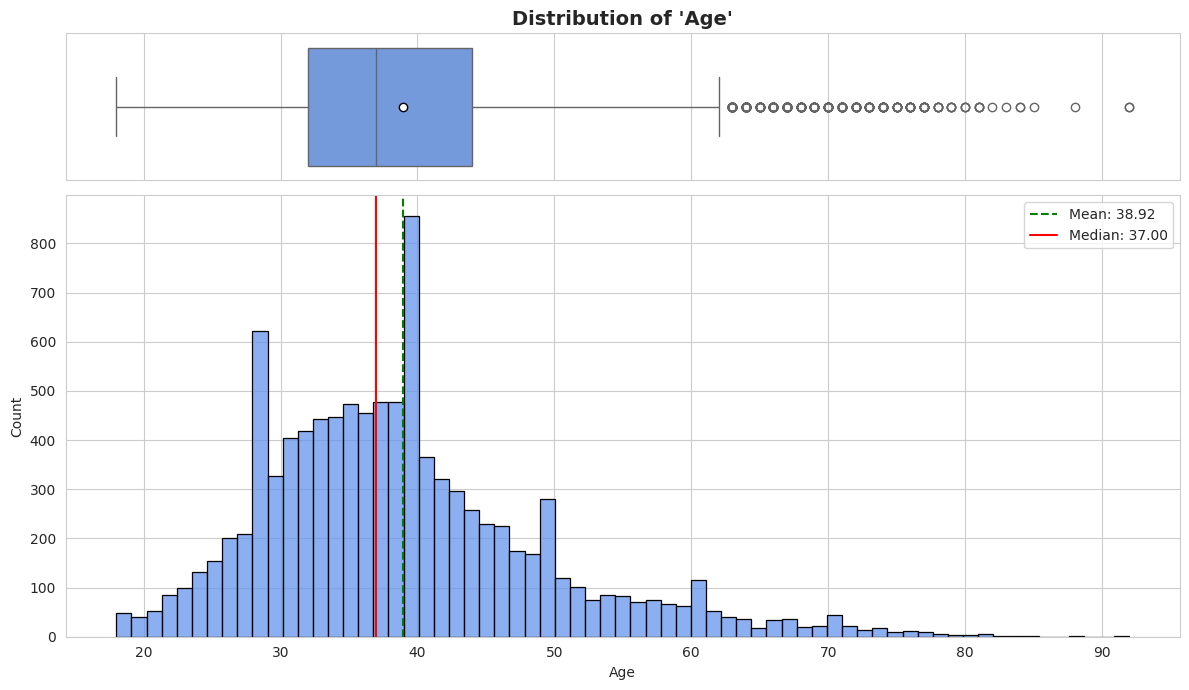

In [534]:
histogram_boxplot(data, 'Age')

The mean and median are slightly apart, showing a bit of right skew.

There's a cluster of customers in the 30–40 age range.

The boxplot shows visible outliers above ~60 years.



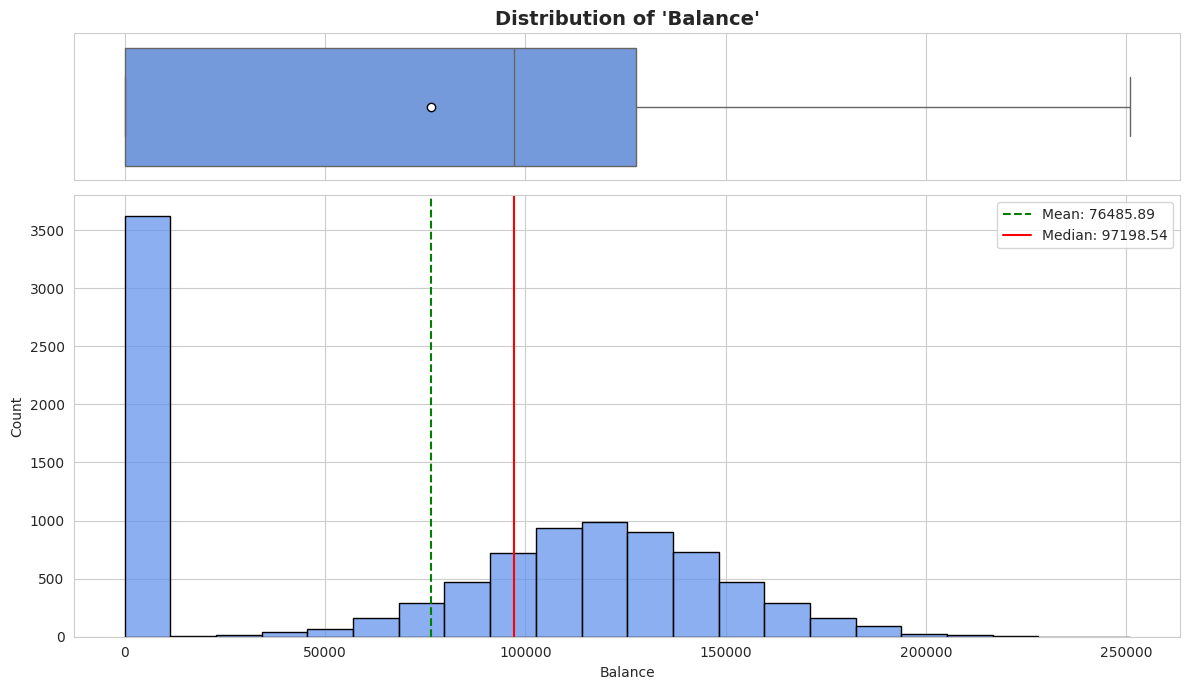

In [535]:
histogram_boxplot(data, 'Balance')

A significant number of customers have a zero balance, visible as a spike at the start.

The distribution is heavily right-skewed, with many customers holding very low balances and fewer with high ones.

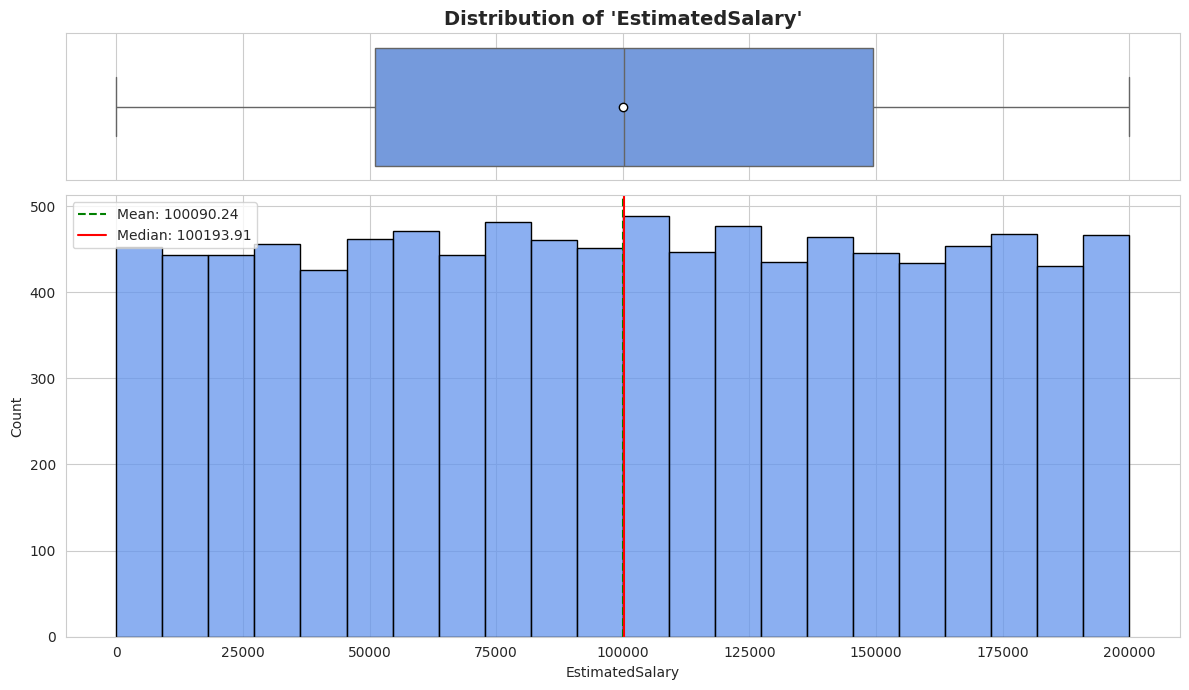

In [536]:
histogram_boxplot(data, 'EstimatedSalary')

The distribution is fairly uniform.

There's no obvious skew, and the mean and median align closely.

The boxplot doesn’t show any significant outliers either.

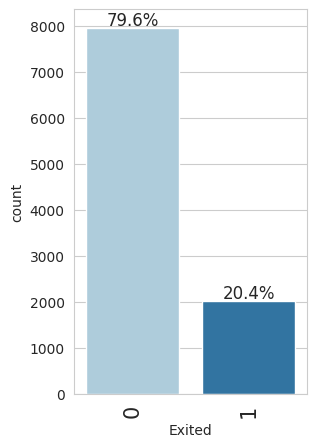

In [537]:
labeled_barplot(data, "Exited", perc=True)

About 20% of customers have exited (churned), while 80% have not.

This shows a clear class imbalance, which is important to consider if we're planning to build a predictive model.

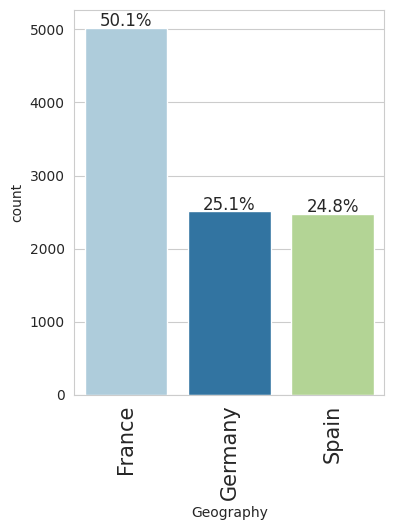

In [538]:
labeled_barplot(data, "Geography", perc=True)

France has the largest share of customers.

Spain and Germany have significantly smaller percentages in comparison.

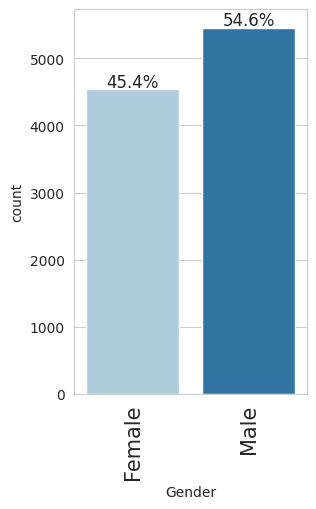

In [539]:
labeled_barplot(data, "Gender", perc=True)

The dataset is fairly balanced between Male and Female customers.

The difference is small, with slightly more males than females.

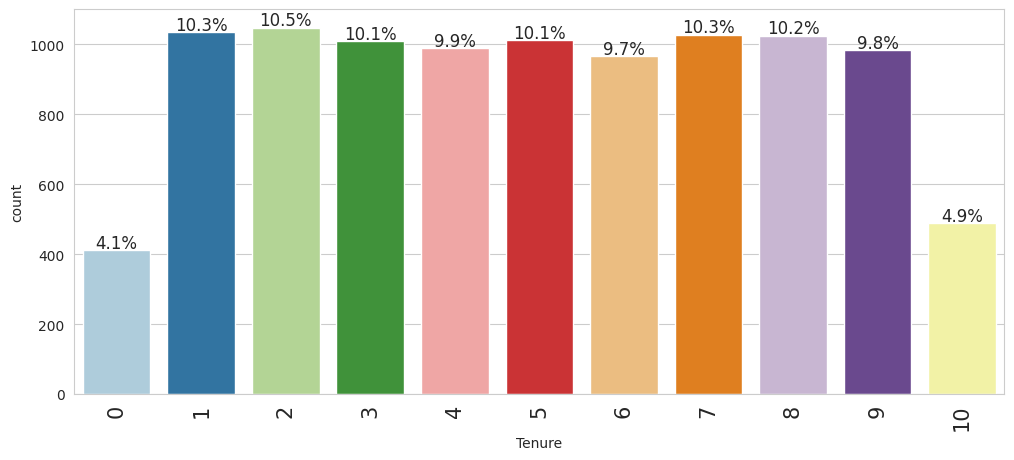

In [540]:
labeled_barplot(data, "Tenure", perc=True)

The tenure is evenly distributed, with each tenure value from 0 to 10 years having a relatively similar share.

There’s no major spike or drop-off, suggesting a steady inflow and retention pattern.

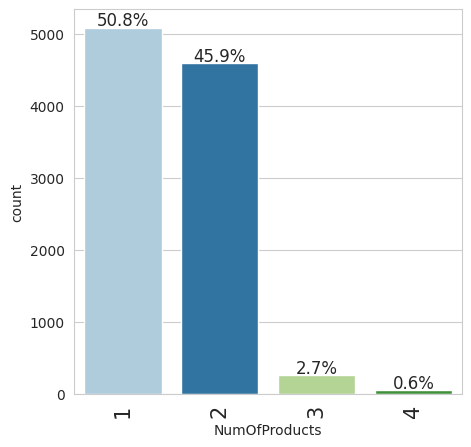

In [541]:
labeled_barplot(data, "NumOfProducts", perc=True)

Most customers have 1 or 2 products.

Very few have 3 or 4 products, with 4 being extremely rare.

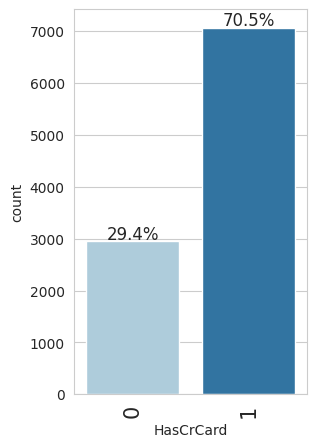

In [542]:
labeled_barplot(data, "HasCrCard", perc=True)

The majority of customers (70.5%) have a credit card.

A smaller group (29.4%) do not.

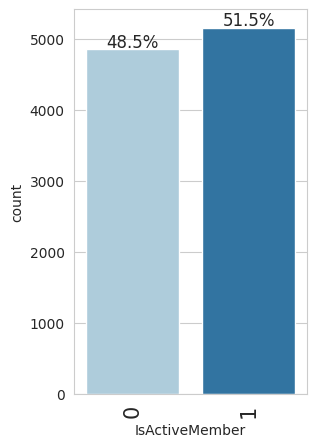

In [543]:
labeled_barplot(data, "IsActiveMember", perc=True)

About 51.5% of customers are active members (1)

About 48.5% are inactive (0)

### Bivariate Analysis

In [544]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print raw counts and plot a stacked bar chart of predictor vs. target.

    Parameters:
    - data: DataFrame
    - predictor: independent/categorical variable
    - target: binary target variable (e.g., 'Exited')
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Raw counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Proportions normalized by row
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), colormap="Set2", edgecolor='black')
    plt.title(f"{target} Distribution across {predictor}", fontsize=14, fontweight='bold')
    plt.ylabel("Proportion")
    plt.xlabel(predictor)
    plt.xticks(rotation=0)
    plt.legend(title=target, loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
    plt.tight_layout()
    plt.show()

###Correlation plot

In [545]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

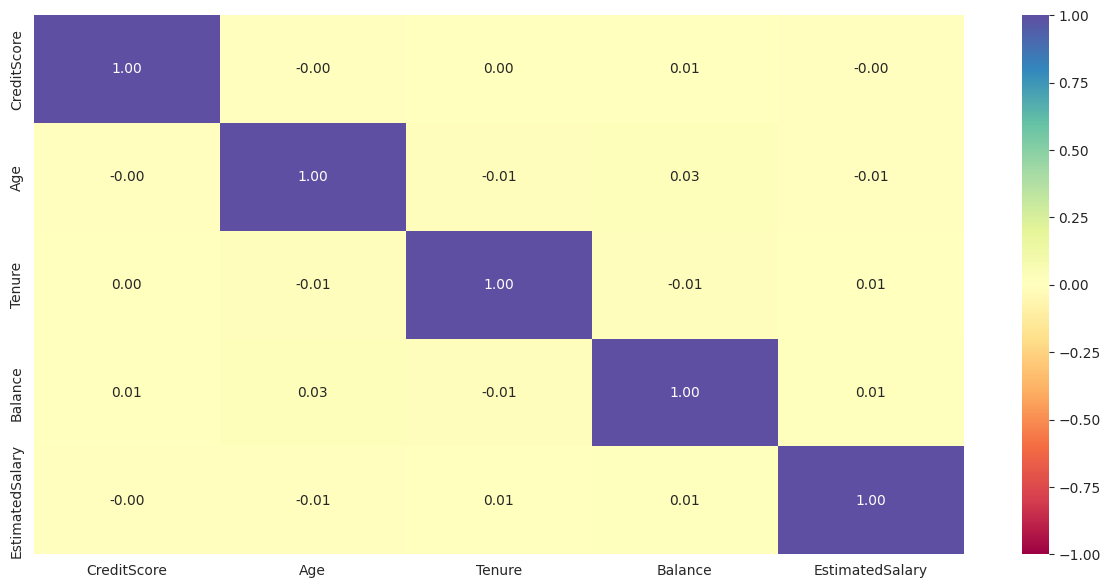

In [546]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Most variables show very weak or no correlation with each other.

Age shows slight positive correlation with Balance.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


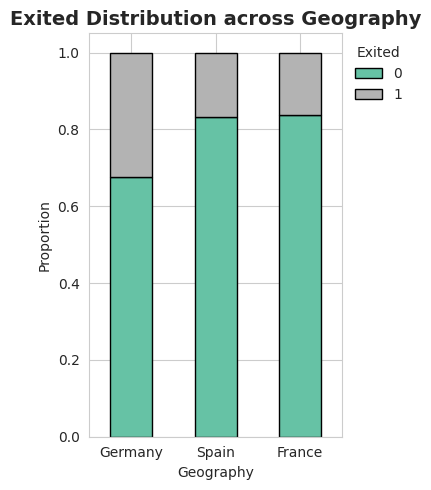

In [547]:
stacked_barplot(data, "Geography", "Exited" )

Germany has the highest churn rate (~32% exited).

France has a much lower churn rate, despite having a similar number of total exits as Germany.

Spain sits in the middle, with a moderate churn rate.



Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


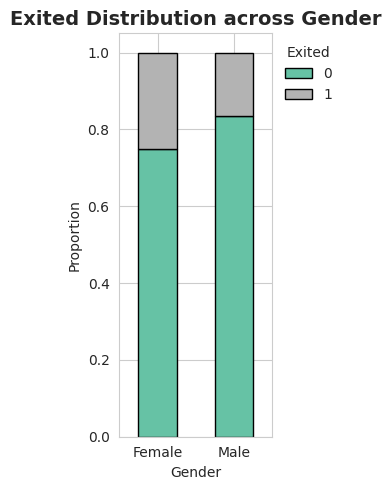

In [548]:
stacked_barplot(data, "Gender", "Exited")

Females have a noticeably higher churn rate compared to males.

Gender appears to be a potential predictor of churn.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


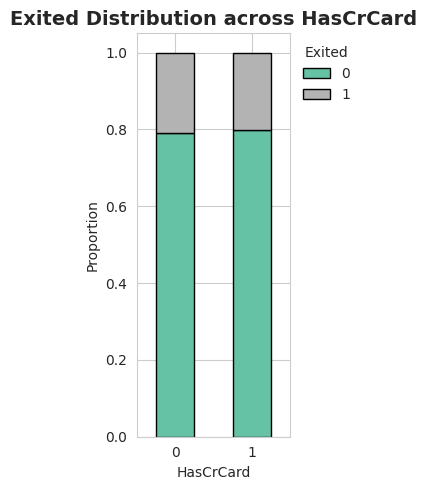

In [549]:
stacked_barplot(data, "HasCrCard", "Exited")


The churn rate is nearly identical between customers with and without a credit card.

This implies that credit card ownership alone isn't a strong predictor of churn.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


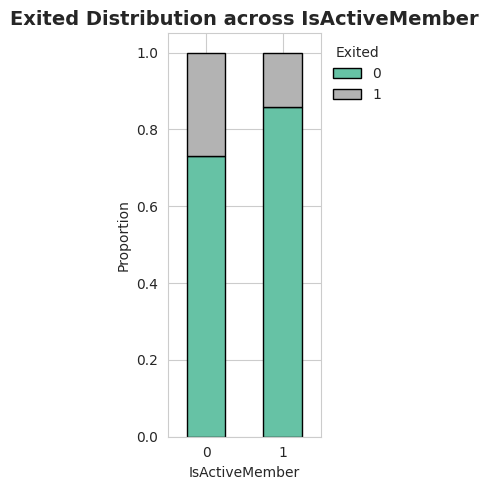

In [550]:
stacked_barplot(data, "IsActiveMember", "Exited")

Inactive members have a much higher churn rate compared to active ones.

This makes IsActiveMember a strong predictor of customer retention.

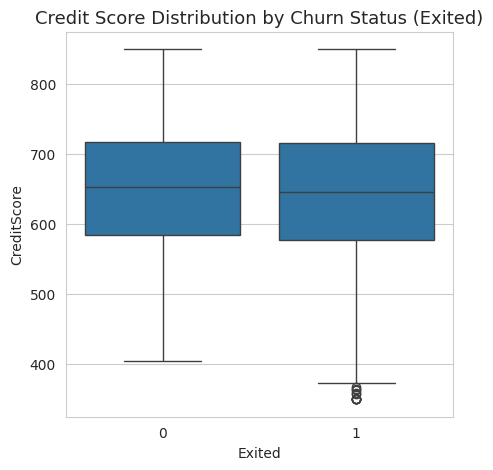

In [551]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.title("Credit Score Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

The median credit scores are very similar for both groups (Exited = 0 and 1).

The spread and IQR (interquartile range) are also similar, indicating that credit score does not differ significantly between churned and retained customers.

A few outliers exist in both groups.

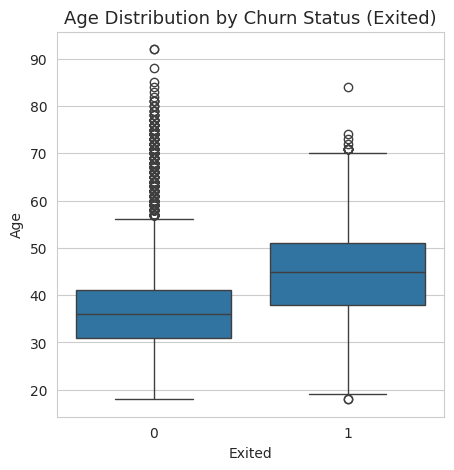

In [552]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.title("Age Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

Customers who exited tend to be older on average.

The median age is higher for churned customers.

Younger customers are less likely to churn.

This indicates that age is a strong predictor of churn — older customers are more at risk.

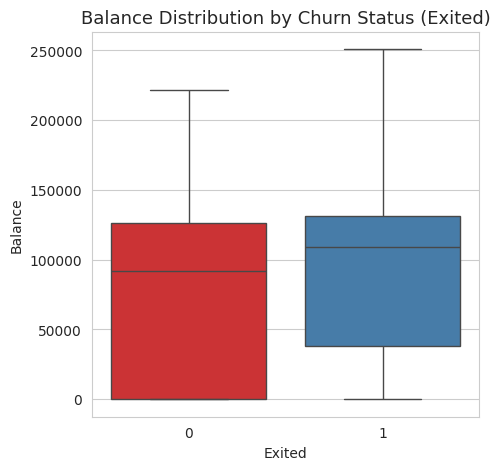

In [553]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data, palette="Set1")
plt.title("Balance Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

The median balance is slightly higher for customers who exited.

There’s a larger spread in the balance among churned customers.

A significant number of customers have a balance of 0 in both groups, but more so among those who stayed.

The upper whisker and outliers suggest some churned customers held substantially higher balances.

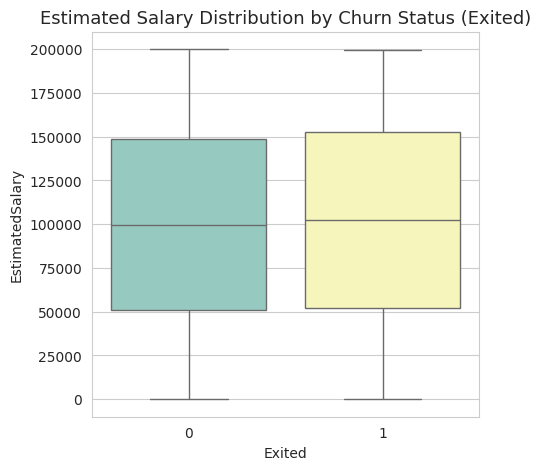

In [554]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data, palette="Set3")
plt.title("Estimated Salary Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

The median salaries are nearly identical for both churned and non-churned customers.

Both groups exhibit a similar distribution and spread.

There are no strong outlier trends or distinct differences in salary ranges between the two.

This indicates that EstimatedSalary has minimal influence on churn in this dataset.

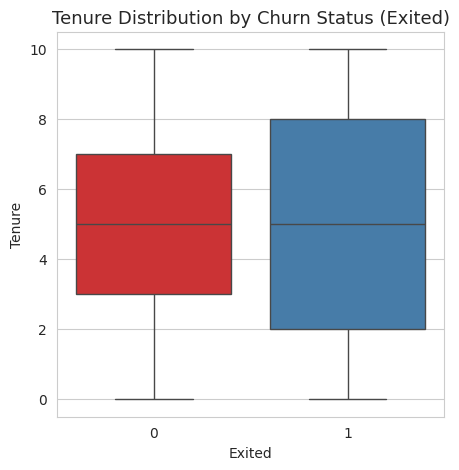

In [555]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data,palette="Set1")
plt.title("Tenure Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

The median tenure is similar for both churned and retained customers.

Customers who exited show slightly more spread in tenure.

No strong relationship is visually evident — churn happens across all tenure levels.

This suggests tenure alone may not be a strong predictor of churn, but it could interact with other features like age or number of products.

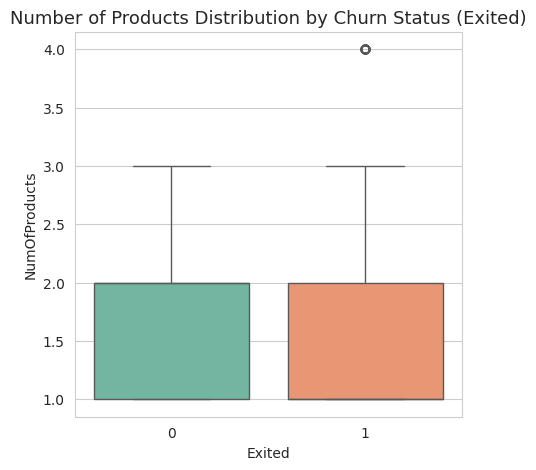

In [556]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data,palette='Set2')
plt.title("Number of Products Distribution by Churn Status (Exited)", fontsize=13)
plt.show()

Most customers have 1 or 2 products, regardless of churn status.

Customers with 4 products are almost exclusively churned, suggesting that higher product count may correlate with dissatisfaction.

## Data Preprocessing

### Dummy Variable Creation and Feature Engineering

In [557]:
def prepare_dataset(df):
    # One-hot encode all object (categorical) columns, drop first to avoid dummy trap
    df = pd.get_dummies(df, columns=df.select_dtypes(include=["object"]).columns.tolist(), drop_first=True)

    # Ensure all data is float type.
    df = df.astype(float)

    # Feature engineering: add HasBalance flag
    df["HasBalance"] = (df["Balance"] > 0).astype(float)

    return df

In [558]:
# Apply the function to the original dataset
p_data = prepare_dataset(data)

# Show the cleaned and processed dataset
p_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasBalance
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0,1.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0,1.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0,1.0


### Train-validation-test Split

In [559]:
X = p_data.drop(['Exited'],axis=1)
y = p_data['Exited']

# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 12) (6400,)
(1600, 12) (1600,)
(2000, 12) (2000,)


In [560]:
p_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
 12  HasBalance         10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


### Data Normalization

In [561]:
# Normalize the data
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols]   = scaler.transform(X_valid[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Since our goal is customer retention, it's better to use Recall. We rather falsely predict someone will churn and act (e.g., send an offer), than miss a churner and lose revenue.

Let's create a function for plotting the confusion matrix

In [562]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [563]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [564]:
epochs = 50
batch_size = 32

In [565]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [566]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [567]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int))

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.2558869701726845), 1: np.float64(4.9079754601226995)}

### Neural Network with SGD Optimizer (Model 0)

In [568]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [569]:
model_0 = Sequential()
model_0.add(Dense(14, activation='relu', input_dim=X_train.shape[1]))
model_0.add(Dense(10, activation='relu'))
model_0.add(Dense(7, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [570]:
optimizer = tf.keras.optimizers.SGD()
metrics = [tf.keras.metrics.Recall()]
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [571]:
start = time.time()
history_0 = model_0.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid), class_weight=cw_dict)
end = time.time()

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.4106 - recall: 0.8971 - val_loss: 0.6884 - val_recall: 0.5951
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3439 - recall: 0.6699 - val_loss: 0.6703 - val_recall: 0.6687
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2901 - recall: 0.7208 - val_loss: 0.6434 - val_recall: 0.6718
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2392 - recall: 0.7358 - val_loss: 0.6158 - val_recall: 0.6687
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1903 - recall: 0.7402 - val_loss: 0.5863 - val_recall: 0.6626
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1521 - recall: 0.7363 - val_loss: 0.5659 - val_recall: 0.6503
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1267 - recall: 0.7346 - val_loss: 0.5509 - val_recall: 0.6564
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1091 - recall: 0.7366 - val_loss: 0.5412 - val_recall: 0.6564
Epoch 9/

In [572]:
print(f"Training time: {end - start} seconds")

Training time: 29.905046463012695 seconds


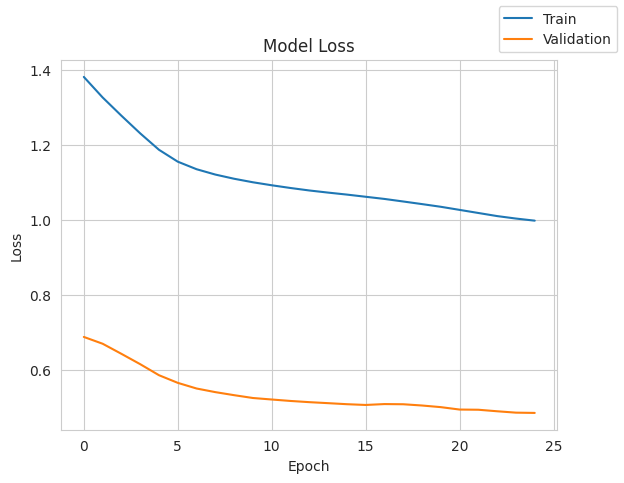

In [573]:
plot(history_0, 'loss')

In [574]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.786719,0.786719,0.828403,0.800249


In [575]:
model_0_valid_perf = model_performance_classification(model_0, X_valid, y_valid)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.766875,0.766875,0.811224,0.781842


## Model Performance Improvement

### Neural Network with Adam Optimizer (Model 1)

In [576]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [577]:
# Intializing the neural network
model_1 = Sequential()
model_1.add(Dense(14, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(7, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [578]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [579]:
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.Recall()]
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [580]:
start = time.time()
history_1 = model_1.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid), class_weight=cw_dict)
end = time.time()

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3961 - recall: 0.9510 - val_loss: 0.7061 - val_recall: 0.7669
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2745 - recall: 0.7984 - val_loss: 0.6422 - val_recall: 0.6840
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1748 - recall: 0.7281 - val_loss: 0.5816 - val_recall: 0.6626
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1065 - recall: 0.7229 - val_loss: 0.5533 - val_recall: 0.6656
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0785 - recall: 0.7246 - val_loss: 0.5459 - val_recall: 0.6840
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0642 - recall: 0.7239 - val_loss: 0.5424 - val_recall: 0.6871
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0541 - recall: 0.7279 - val_loss: 0.5378 - val_recall: 0.6840
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0454 - recall: 0.7274 - val_loss: 0.5339 - val_recall: 0.6902
Epoch 9/

In [581]:
print(f"Training time: {end - start} seconds")

Training time: 25.962740182876587 seconds


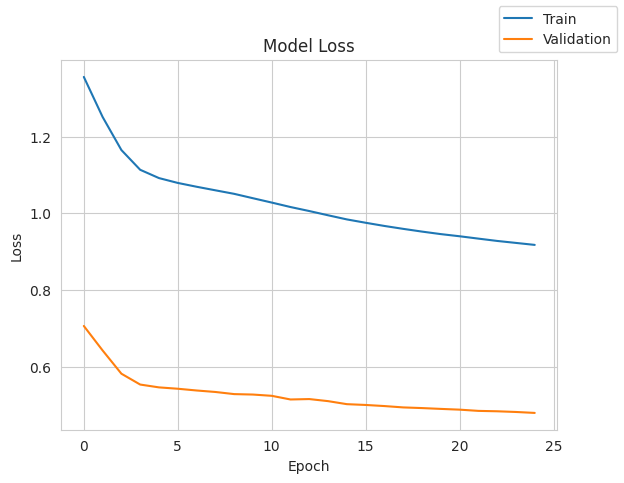

In [582]:
plot(history_1, 'loss')

In [583]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.790625,0.790625,0.839275,0.805213


In [584]:
model_1_valid_perf = model_performance_classification(model_1, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.774375,0.774375,0.826165,0.79037


### Neural Network with Adam Optimizer and Dropout (Model 2)

In [585]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [586]:
# Intializing the neural network
model_2 = Sequential()
model_2.add(Dense(14, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(7, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

In [587]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [588]:
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.Recall()]
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [589]:
start = time.time()
history_2 = model_2.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid), class_weight=cw_dict)
end = time.time()

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4409 - recall: 0.5024 - val_loss: 0.6443 - val_recall: 0.5215
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3743 - recall: 0.5594 - val_loss: 0.6474 - val_recall: 0.5951
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3293 - recall: 0.6224 - val_loss: 0.6326 - val_recall: 0.6074
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2787 - recall: 0.6794 - val_loss: 0.6069 - val_recall: 0.6288
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2609 - recall: 0.6966 - val_loss: 0.6109 - val_recall: 0.6779
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2755 - recall: 0.7190 - val_loss: 0.6169 - val_recall: 0.6963
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2528 - recall: 0.7341 - val_loss: 0.6160 - val_recall: 0.6810
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2177 - recall: 0.7443 - val_loss: 0.6040 - val_recall: 0.6871
Epoch 9/

In [590]:
print(f"Training time: {end - start} seconds")

Training time: 27.045986652374268 seconds


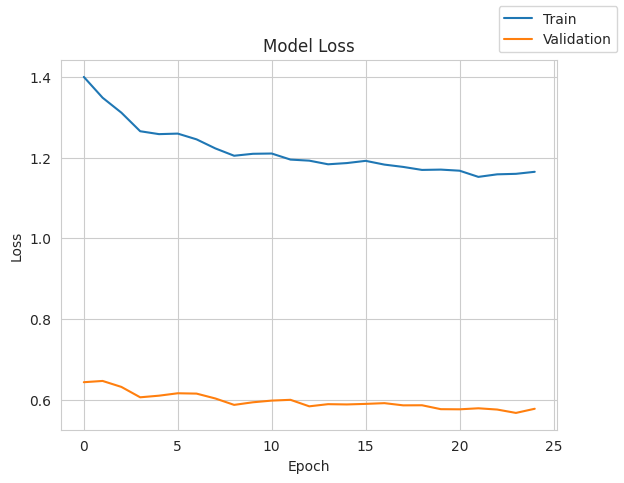

In [591]:
plot(history_2, 'loss')

In [592]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.739375,0.739375,0.813073,0.760819


In [593]:
model_2_valid_perf = model_performance_classification(model_2, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.723125,0.723125,0.802043,0.74639


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer (Model 3)

In [594]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [595]:
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 12)
After UpSampling, the shape of train_y: (10192,) 



In [596]:
model_3 = Sequential()
model_3.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(7, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [597]:
optimizer = tf.keras.optimizers.SGD()
metrics = [tf.keras.metrics.Recall()]
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [598]:
history_3 = model_3.fit(
              X_train_smote,
              y_train_smote,
              epochs=25,
              batch_size=32,
              validation_data=(X_valid, y_valid))

Epoch 1/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7063 - recall: 0.9089 - val_loss: 0.6997 - val_recall: 0.6012
Epoch 2/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6765 - recall: 0.6047 - val_loss: 0.6877 - val_recall: 0.6963
Epoch 3/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6545 - recall: 0.6846 - val_loss: 0.6670 - val_recall: 0.6840
Epoch 4/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6319 - recall: 0.6997 - val_loss: 0.6421 - val_recall: 0.6871
Epoch 5/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6085 - recall: 0.7162 - val_loss: 0.6182 - val_recall: 0.6779
Epoch 6/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5860 - recall: 0.7305 - val_loss: 0.5963 - val_recall: 0.6933
Epoch 7/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5679 - recall: 0.7336 - val_loss: 0.5830 - val_recall: 0.6748
Epoch 8/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5562 - recall: 0.7346 - val_loss: 0.5767 - val_recall: 0.6810
Epoch 9/

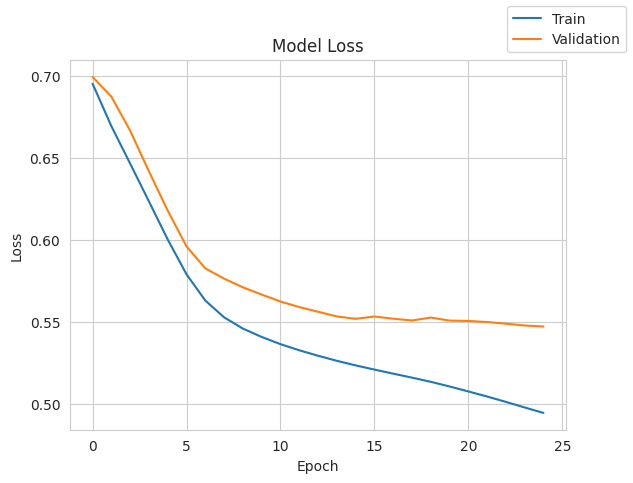

In [599]:
plot(history_3, 'loss')

In [600]:
model_3_train_perf = model_performance_classification(model_3, X_train_smote, y_train_smote)
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.759615,0.759615,0.760232,0.759473


In [601]:
model_3_valid_perf = model_performance_classification(model_3, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.72375,0.72375,0.803664,0.747094


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer (Model 4)

In [602]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [603]:
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 12)
After UpSampling, the shape of train_y: (10192,) 



In [604]:
# Intializing the neural network
model_4 = Sequential()
model_4.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dense(7, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

In [605]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [606]:
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.Recall()]
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [607]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [608]:
history_4 = model_4.fit(
              X_train_smote,
              y_train_smote,
              epochs=25,
              batch_size=32,
              validation_data=(X_valid, y_valid))

Epoch 1/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6848 - recall: 0.9274 - val_loss: 0.6658 - val_recall: 0.7025
Epoch 2/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5798 - recall: 0.7264 - val_loss: 0.5566 - val_recall: 0.6718
Epoch 3/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5341 - recall: 0.7217 - val_loss: 0.5414 - val_recall: 0.6564
Epoch 4/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5233 - recall: 0.7310 - val_loss: 0.5358 - val_recall: 0.6656
Epoch 5/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5148 - recall: 0.7374 - val_loss: 0.5322 - val_recall: 0.6626
Epoch 6/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5060 - recall: 0.7479 - val_loss: 0.5245 - val_recall: 0.6718
Epoch 7/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4980 - recall: 0.7546 - val_loss: 0.5202 - val_recall: 0.6871
Epoch 8/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4906 - recall: 0.7600 - val_loss: 0.5166 - val_recall: 0.6933
Epoch 9/

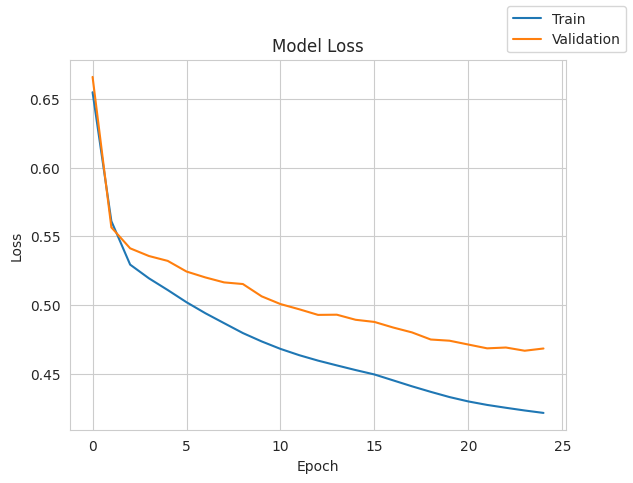

In [609]:
plot(history_4, 'loss')

In [610]:
model_4_train_perf = model_performance_classification(model_4, X_train_smote, y_train_smote)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.799647,0.799647,0.799656,0.799645


In [611]:
model_4_valid_perf = model_performance_classification(model_4, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78375,0.78375,0.834323,0.799028


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout (Model 5)

In [612]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [613]:
model_5 = Sequential()
model_5.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))
model_5.add(Dropout(0.4))
model_5.add(Dense(10, activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(7, activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation='sigmoid'))

In [614]:
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.Recall()]
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [615]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [616]:
history_5 = model_5.fit(
              X_train_smote,
              y_train_smote,
              epochs=25,
              batch_size=32,
              validation_data=(X_valid, y_valid))

Epoch 1/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.7045 - recall: 0.5087 - val_loss: 0.6325 - val_recall: 0.6043
Epoch 2/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6380 - recall: 0.6585 - val_loss: 0.5959 - val_recall: 0.6166
Epoch 3/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6197 - recall: 0.6948 - val_loss: 0.5950 - val_recall: 0.6718
Epoch 4/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6138 - recall: 0.7321 - val_loss: 0.5797 - val_recall: 0.6656
Epoch 5/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6015 - recall: 0.7354 - val_loss: 0.5830 - val_recall: 0.6779
Epoch 6/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5963 - recall: 0.7520 - val_loss: 0.5736 - val_recall: 0.6534
Epoch 7/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5927 - recall: 0.7267 - val_loss: 0.5701 - val_recall: 0.6626
Epoch 8/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5774 - recall: 0.7220 - val_loss: 0.5711 - val_recall: 0.6472
Epoch 9

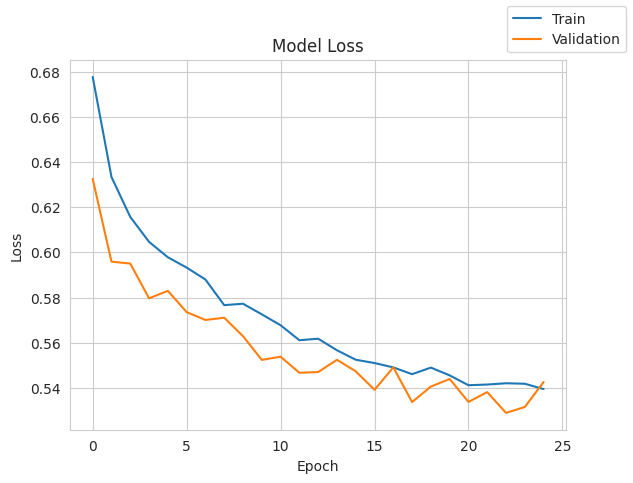

In [617]:
plot(history_5, 'loss')

In [618]:
model_5_train_perf = model_performance_classification(model_5, X_train_smote, y_train_smote)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.767661,0.767661,0.767679,0.767657


In [619]:
model_5_valid_perf = model_performance_classification(model_5, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.743125,0.743125,0.806426,0.762826


## Model Performance Comparison and Final Model Selection

In [620]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
        #model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam optimizer)",
    "Neural Network (Adam, dropout [0.4,0.2,0.2])",
    "Neural Network (SGD, Balanced Data(SMOTE))",
    "Neural Network (Adam, Balanced(SMOTE))",
    "Neural Network (Adam, Balanced(SMOTE), dropout [0.4,0.2,0.2])"
]

In [621]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
        #model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam optimizer)",
    "Neural Network (Adam, dropout [0.4,0.2,0.2])",
    "Neural Network (SGD, Balanced Data(SMOTE))",
    "Neural Network (Adam, Balanced(SMOTE))",
    "Neural Network (Adam, Balanced(SMOTE), dropout [0.4,0.2,0.2])"
]

In [622]:
models_train_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam optimizer),"Neural Network (Adam, dropout [0.4,0.2,0.2])","Neural Network (SGD, Balanced Data(SMOTE))","Neural Network (Adam, Balanced(SMOTE))","Neural Network (Adam, Balanced(SMOTE), dropout [0.4,0.2,0.2])"
Accuracy,0.786719,0.790625,0.739375,0.759615,0.799647,0.767661
Recall,0.786719,0.790625,0.739375,0.759615,0.799647,0.767661
Precision,0.828403,0.839275,0.813073,0.760232,0.799656,0.767679
F1 Score,0.800249,0.805213,0.760819,0.759473,0.799645,0.767657


In [623]:
models_valid_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam optimizer),"Neural Network (Adam, dropout [0.4,0.2,0.2])","Neural Network (SGD, Balanced Data(SMOTE))","Neural Network (Adam, Balanced(SMOTE))","Neural Network (Adam, Balanced(SMOTE), dropout [0.4,0.2,0.2])"
Accuracy,0.766875,0.774375,0.723125,0.723750,0.783750,0.743125
Recall,0.766875,0.774375,0.723125,0.723750,0.783750,0.743125
Precision,0.811224,0.826165,0.802043,0.803664,0.834323,0.806426
F1 Score,0.781842,0.790370,0.746390,0.747094,0.799028,0.762826


In [624]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

,Recall
Neural Network (SGD Optimizer),0.019844
Neural Network (Adam optimizer),0.016250
"Neural Network (Adam, dropout [0.4,0.2,0.2])",0.016250
"Neural Network (SGD, Balanced Data(SMOTE))",0.035865
"Neural Network (Adam, Balanced(SMOTE))",0.015897
"Neural Network (Adam, Balanced(SMOTE), dropout [0.4,0.2,0.2])",0.024536


**Final Model (Adam Optimizer + SMOTE balanced)**

In [634]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

In [635]:
# Intializing the neural network
model_4 = Sequential()
model_4.add(Dense(14, activation='relu', input_dim=X_train_smote.shape[1]))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dense(7, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

In [636]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,253 (4.90 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 836 (3.27 KB)

In [637]:
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.Recall()]
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [638]:
history_4 = model_4.fit(
              X_train_smote,
              y_train_smote,
              epochs=25,
              batch_size=32,
              validation_data=(X_valid, y_valid))

Epoch 1/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6848 - recall: 0.9274 - val_loss: 0.6658 - val_recall: 0.7025
Epoch 2/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5798 - recall: 0.7264 - val_loss: 0.5566 - val_recall: 0.6718
Epoch 3/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5341 - recall: 0.7217 - val_loss: 0.5414 - val_recall: 0.6564
Epoch 4/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5233 - recall: 0.7310 - val_loss: 0.5358 - val_recall: 0.6656
Epoch 5/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5148 - recall: 0.7374 - val_loss: 0.5322 - val_recall: 0.6626
Epoch 6/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5060 - recall: 0.7479 - val_loss: 0.5245 - val_recall: 0.6718
Epoch 7/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4980 - recall: 0.7546 - val_loss: 0.5202 - val_recall: 0.6871
Epoch 8/25
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4906 - recall: 0.7600 - val_loss: 0.5166 - val_recall: 0.6933
Epoch 9/

In [639]:
y_train_pred = model_1.predict(X_train_smote)
y_valid_pred = model_1.predict(X_valid)
y_test_pred = model_1.predict(X_test)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [640]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train_smote,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      5096
         1.0       0.79      0.77      0.78      5096

    accuracy                           0.78     10192
   macro avg       0.78      0.78      0.78     10192
weighted avg       0.78      0.78      0.78     10192



In [641]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      1274
         1.0       0.47      0.73      0.57       326

    accuracy                           0.77      1600
   macro avg       0.69      0.76      0.71      1600
weighted avg       0.83      0.77      0.79      1600



In [642]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1593
         1.0       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.78      0.79      2000



## Actionable Insights and Business Recommendations

- A neural network model trained using the Adam optimizer on SMOTE-balanced data achieved a recall of 78.4% on the validation set.

- This means the model correctly identifies nearly 4 out of 5 customers likely to churn.

- It also maintains a high precision of 83.4%, ensuring that most flagged customers are genuinely at risk.

- This balance between high recall and precision makes the model highly actionable for retention efforts.

- Use the model to score customers weekly/monthly on churn probability.

- Integrate this score into the CRM system or a churn dashboard.

- Rank customers by risk to focus retention efforts.

Examples of retention tactics:

- Exclusive offers or discounts

- Personalized outreach from customer success teams

- Enhanced support or loyalty program invitations

- Marketing → personalized email campaigns

- Customer Support → proactive check-ins with at-risk accounts


<font size=6 color='blue'>Power Ahead</font>
___